In [1]:
# Importing required libraries
import pandas as pd            # Library for data manipulation and analysis
import numpy as np             # Library for numerical operations
import seaborn as sns          # Library for data visualization based on matplotlib
import matplotlib.pyplot as plt   # Library for creating visualizations

In [2]:
# Read the CSV file 'diabetes.csv' and store the data in a DataFrame called 'df'
df = pd.read_csv('diabetes.csv')

# Set the display options for the DataFrame to show all columns
pd.set_option("display.max_columns", None)

# Set the display options for the DataFrame to show all rows
pd.set_option("display.max_rows", None)

# Set the display format for float numbers in the DataFrame to show up to 3 decimal places
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
#Size of dataset(number of rows, number of columns)
df.shape

(768, 9)

In [4]:
#Displaying first rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [5]:
# To show statistical summary of the columns of our data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [6]:
#Identifying information about composition and potential data quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Checking missing values in dataset
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Displaying the columns in dataset
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Categorical Columns:
Index([], dtype='object')


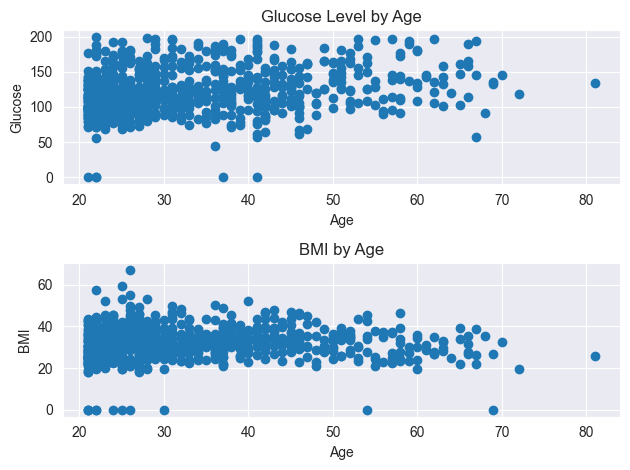

In [19]:
# Создание первого подграфика: Глюкоза в зависимости от возраста
plt.subplot(2, 1, 1) # (строки, колонки, номер панели)
plt.plot(df['Age'], df['Glucose'], 'o') # Используем scatter plot для отображения отдельных точек
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Glucose Level by Age')

# Создание второго подграфика: Индекс массы тела (BMI) в зависимости от возраста
plt.subplot(2, 1, 2) # (строки, колонки, номер панели)
plt.plot(df['Age'], df['BMI'], 'o') # Используем scatter plot для отображения отдельных точек
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI by Age')

# Отображение графиков
plt.tight_layout()
plt.show()

In [20]:
age_groups = df.groupby('Age')
mean_glucose = age_groups['Glucose'].mean()
std_glucose = age_groups['Glucose'].std()
mean_bmi = age_groups['BMI'].mean()
std_bmi = age_groups['BMI'].std()

ages = mean_glucose.index


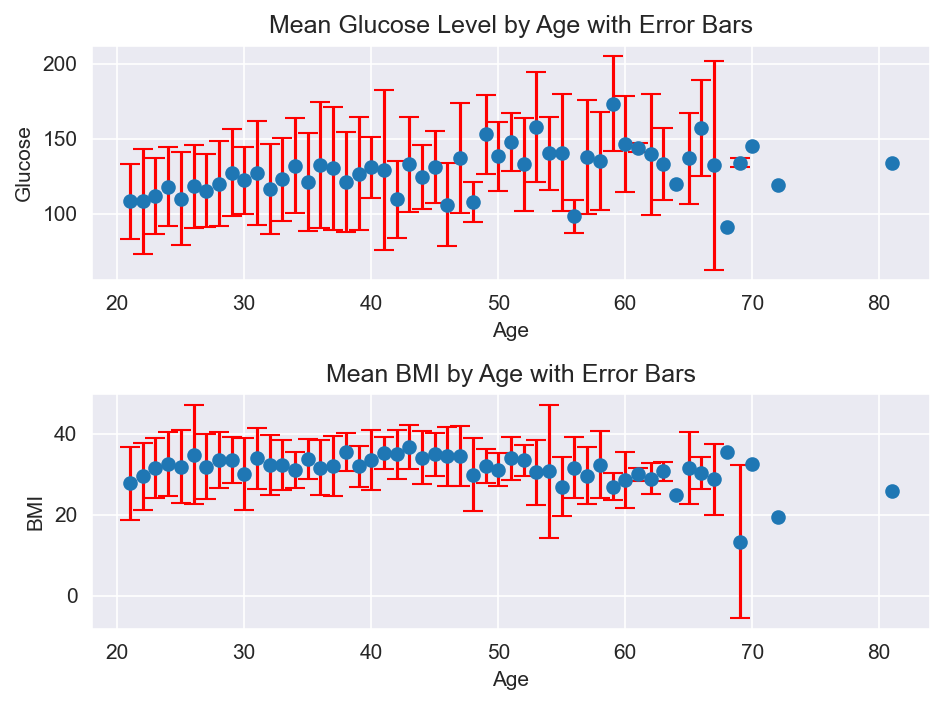

In [21]:
# Создание фигуры
plt.figure(dpi=150)

# Первый подграфик: Глюкоза в зависимости от возраста с полосами ошибки
plt.subplot(2, 1, 1)
plt.errorbar(ages, mean_glucose, yerr=std_glucose, fmt='o', ecolor='red', capsize=5)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Mean Glucose Level by Age with Error Bars')

# Второй подграфик: Индекс массы тела (BMI) в зависимости от возраста с полосами ошибки
plt.subplot(2, 1, 2)
plt.errorbar(ages, mean_bmi, yerr=std_bmi, fmt='o', ecolor='red', capsize=5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Mean BMI by Age with Error Bars')

# Отображение графиков
plt.tight_layout()
plt.show()


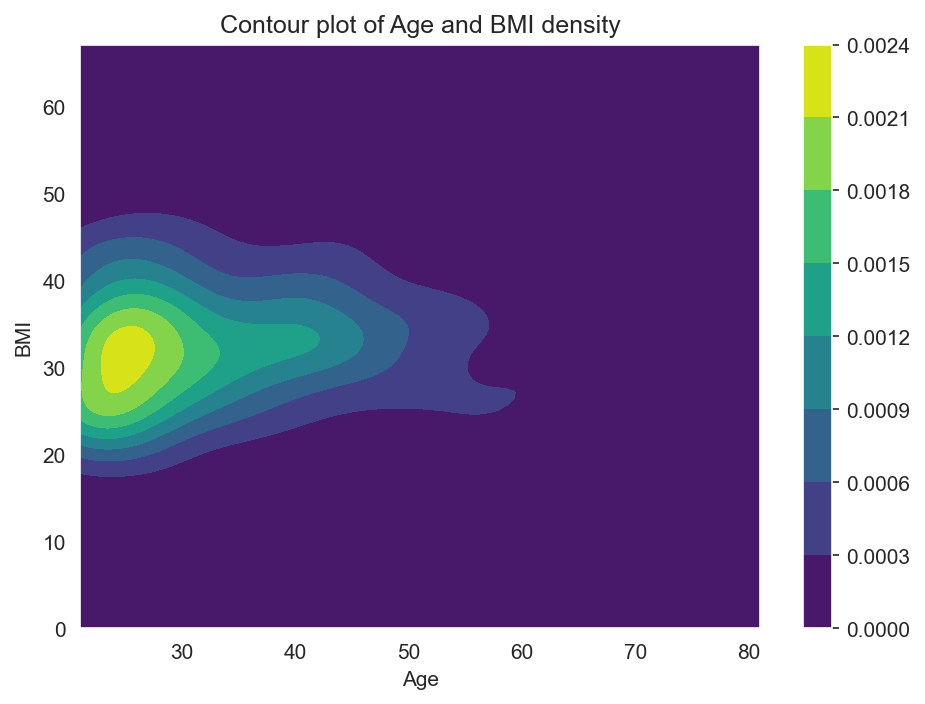

In [28]:
from scipy.interpolate import griddata
from scipy.stats import gaussian_kde
# Создание сетки данных
age = df['Age']
bmi = df['BMI']

# Создание сетки для контурного графика
xi, yi = np.linspace(age.min(), age.max(), 100), np.linspace(bmi.min(), bmi.max(), 100)
X, Y = np.meshgrid(xi, yi)

# Оценка плотности с использованием гауссовского ядра
k = gaussian_kde(np.vstack([age, bmi]))
Z = np.reshape(k(np.vstack([X.ravel(), Y.ravel()])), X.shape)

# Создание фигуры
plt.figure(dpi=150)

# Контурный график плотности
contour = plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Contour plot of Age and BMI density')

# Отображение графика
plt.tight_layout()
plt.show()

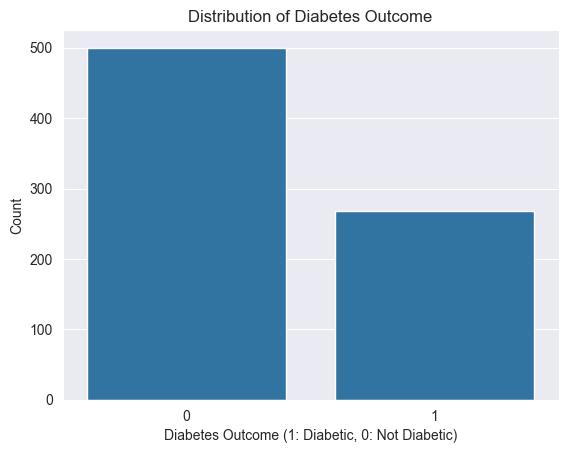

In [9]:
sns.countplot(x="Outcome", data=df)
plt.xlabel("Diabetes Outcome (1: Diabetic, 0: Not Diabetic)")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome")
plt.show()

<Figure size 600x400 with 0 Axes>

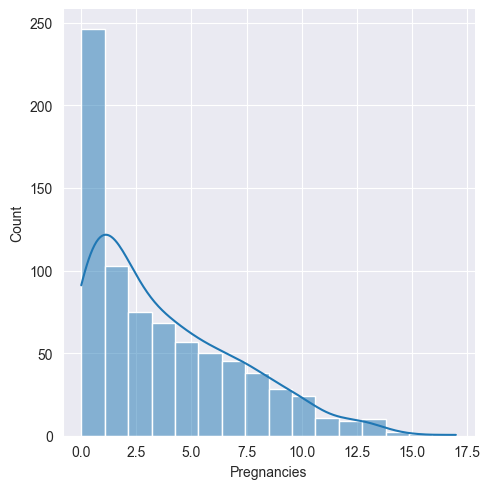

<Figure size 600x400 with 0 Axes>

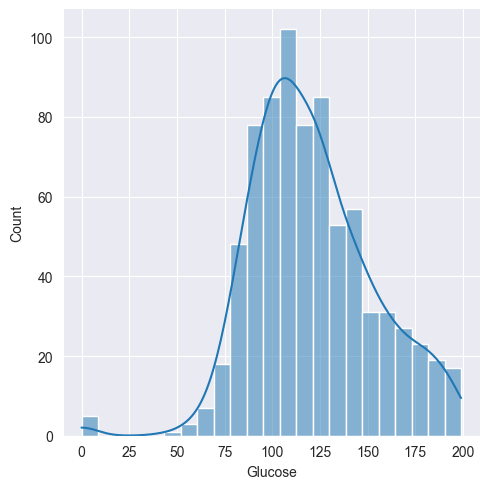

<Figure size 600x400 with 0 Axes>

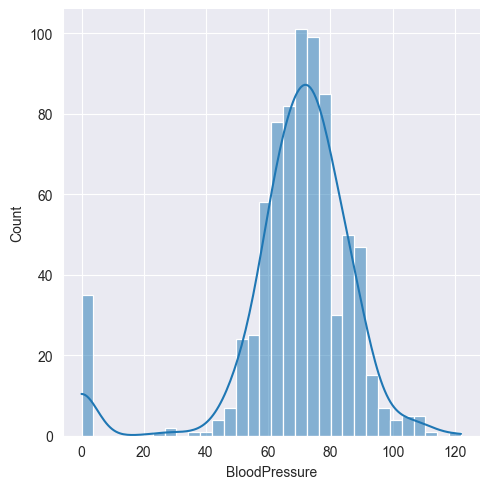

<Figure size 600x400 with 0 Axes>

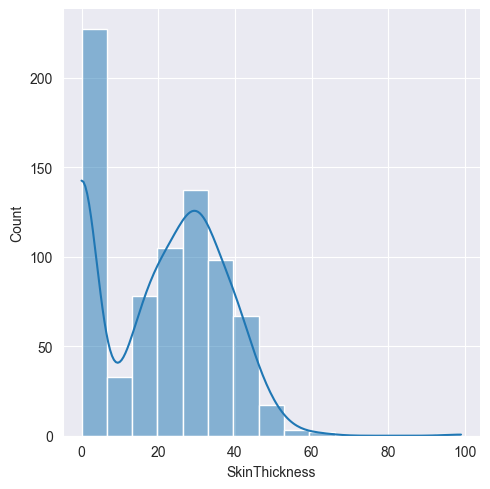

<Figure size 600x400 with 0 Axes>

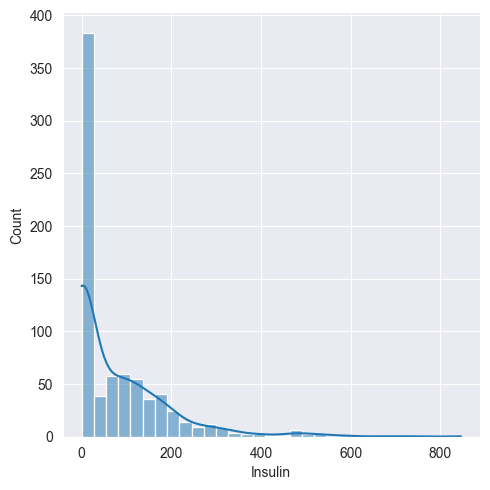

<Figure size 600x400 with 0 Axes>

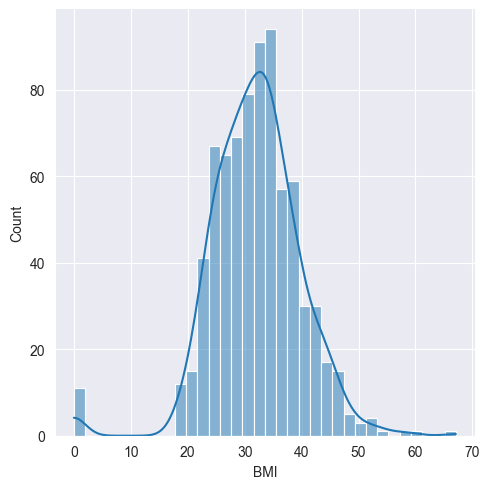

<Figure size 600x400 with 0 Axes>

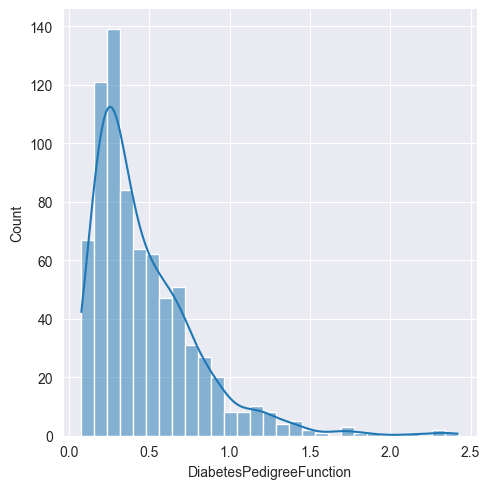

<Figure size 600x400 with 0 Axes>

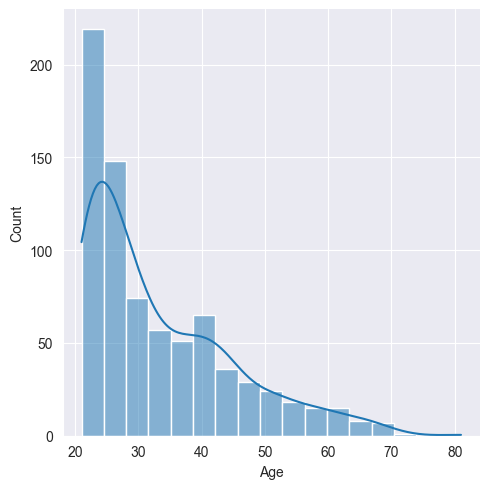

<Figure size 600x400 with 0 Axes>

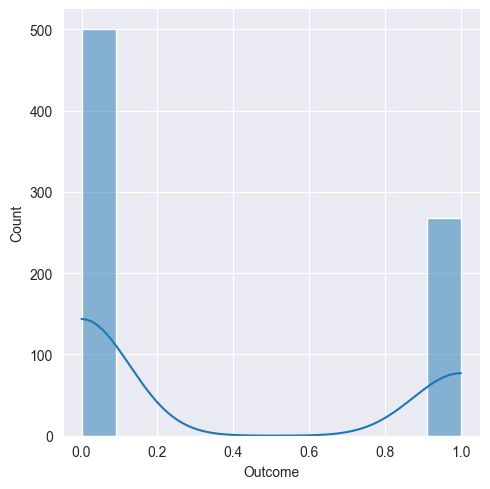

In [10]:
# Loop through each column in the DataFrame and plot the distribution of each column using seaborn displot
for col in df.columns:
    # Create a new figure with the specified size
    plt.figure(figsize=(6, 4))
    # Use seaborn displot to plot the distribution of the column with kde (Kernel Density Estimation) enabled
    sns.displot(data=df[col], kde=True)
    # Display the plot
    plt.show()

The presence of zeroes has skewed the distributions highly. Only the BMI seems to be normally distributed. Also, it is an imbalanced dataset as non-diabetic patients are almost twice in number

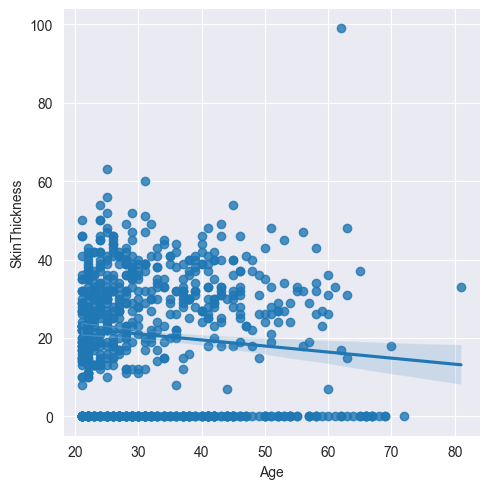

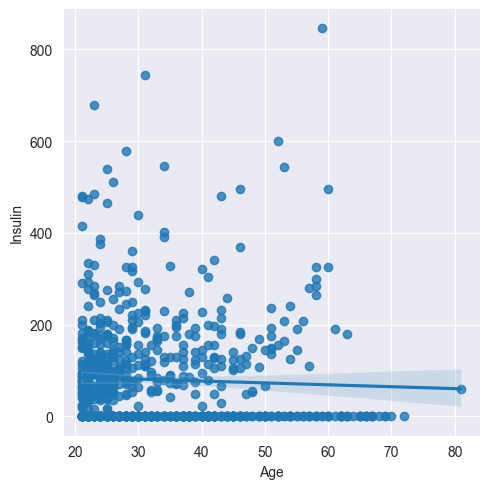

In [11]:
sns.lmplot(x = 'Age', y = 'SkinThickness', data=df)
sns.lmplot(x = 'Age', y = 'Insulin', data=df)

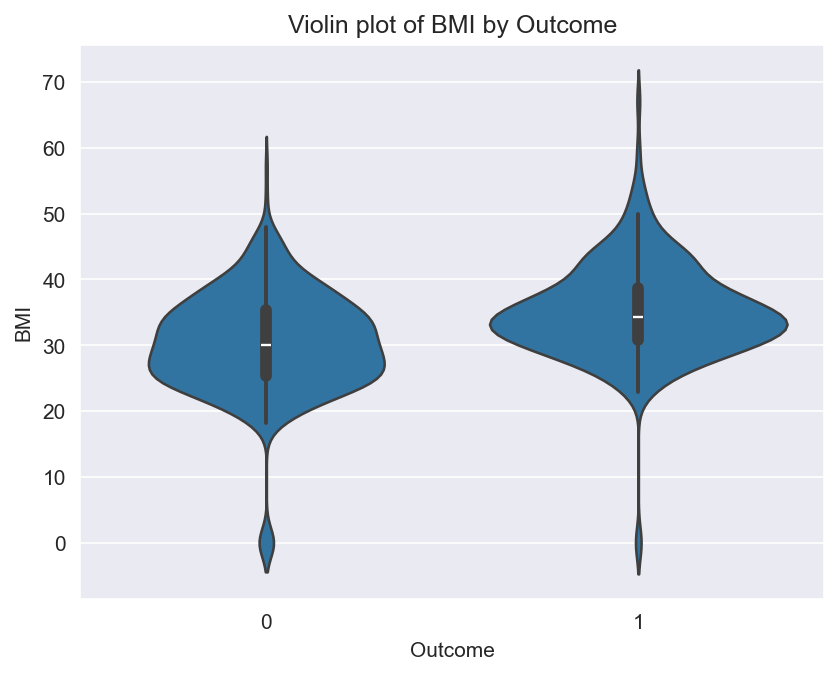

In [29]:
# Создание виолинового графика
plt.figure(dpi=150)
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.title('Violin plot of BMI by Outcome')
plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

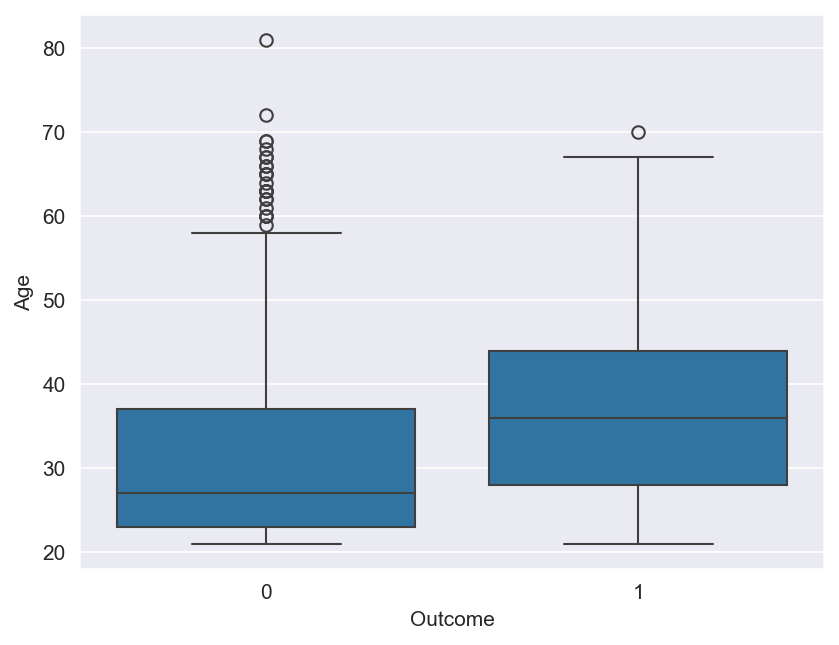

In [32]:
plt.figure(dpi=150)
sns.boxplot(x='Outcome', y='Age', data = df)

<Axes: xlabel='Outcome', ylabel='BMI'>

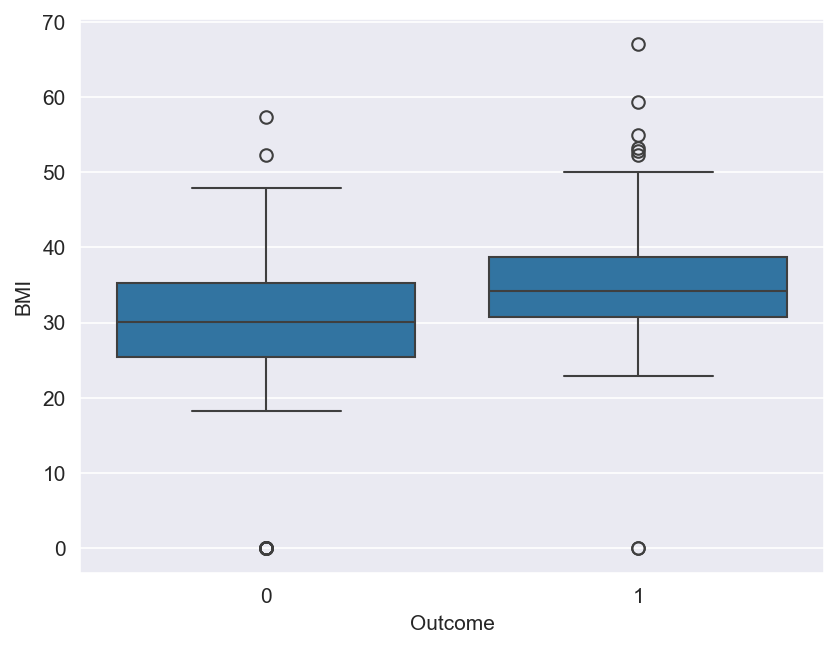

In [33]:
plt.figure(dpi=150)
sns.boxplot(x='Outcome', y='BMI', data = df)

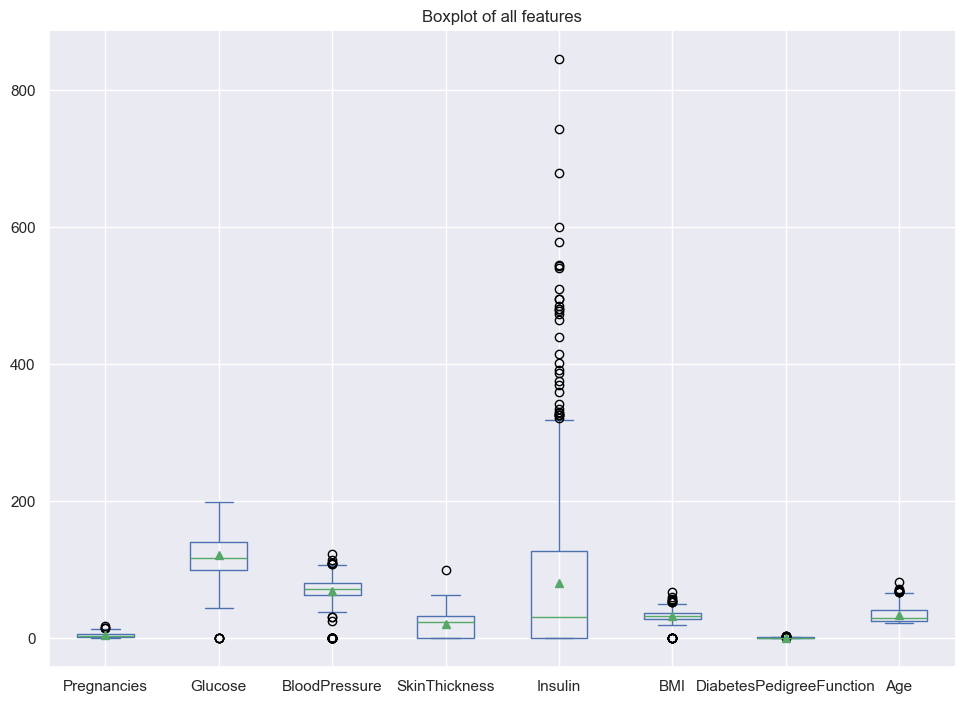

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']].plot(kind='box', title='Boxplot of all features', showmeans=True)
plt.show()

We see that there are outliers in each trait, but the favorite, based on the graph, is Insulin.

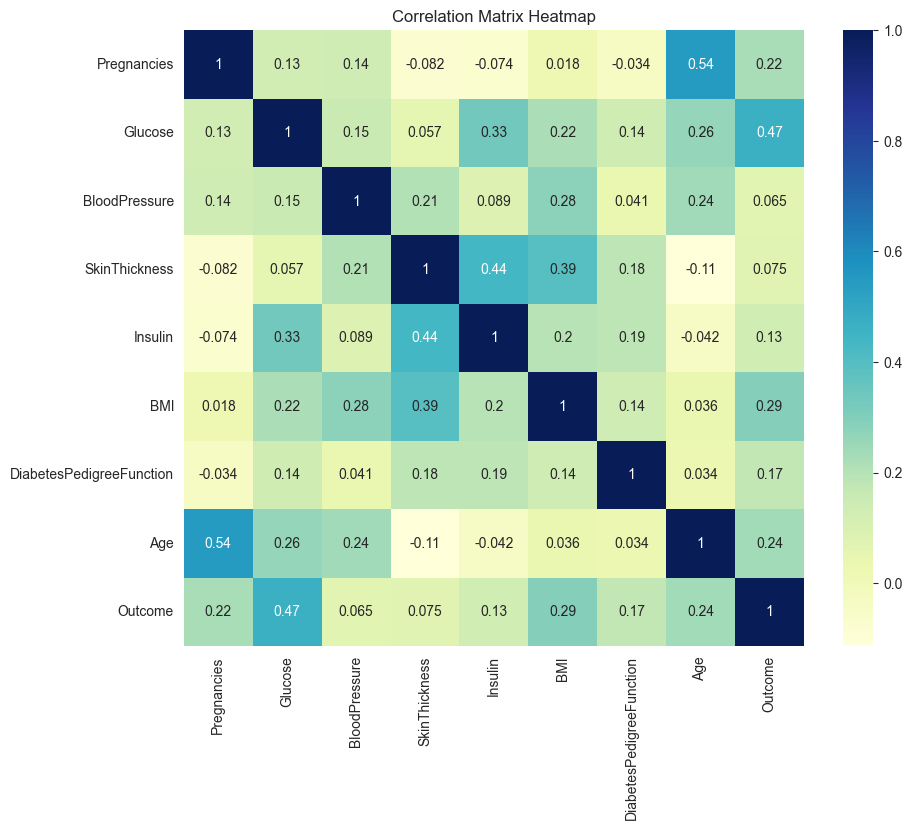

In [12]:
# Compute correlation matrix
corr_matrix = df.corr(method = 'pearson')

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8)) #size
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

Glucose, BMI, Age and Pregnancies have the biggest influence on the outcome (in this order). But, blood pressure and skin thickness have the smallest influence

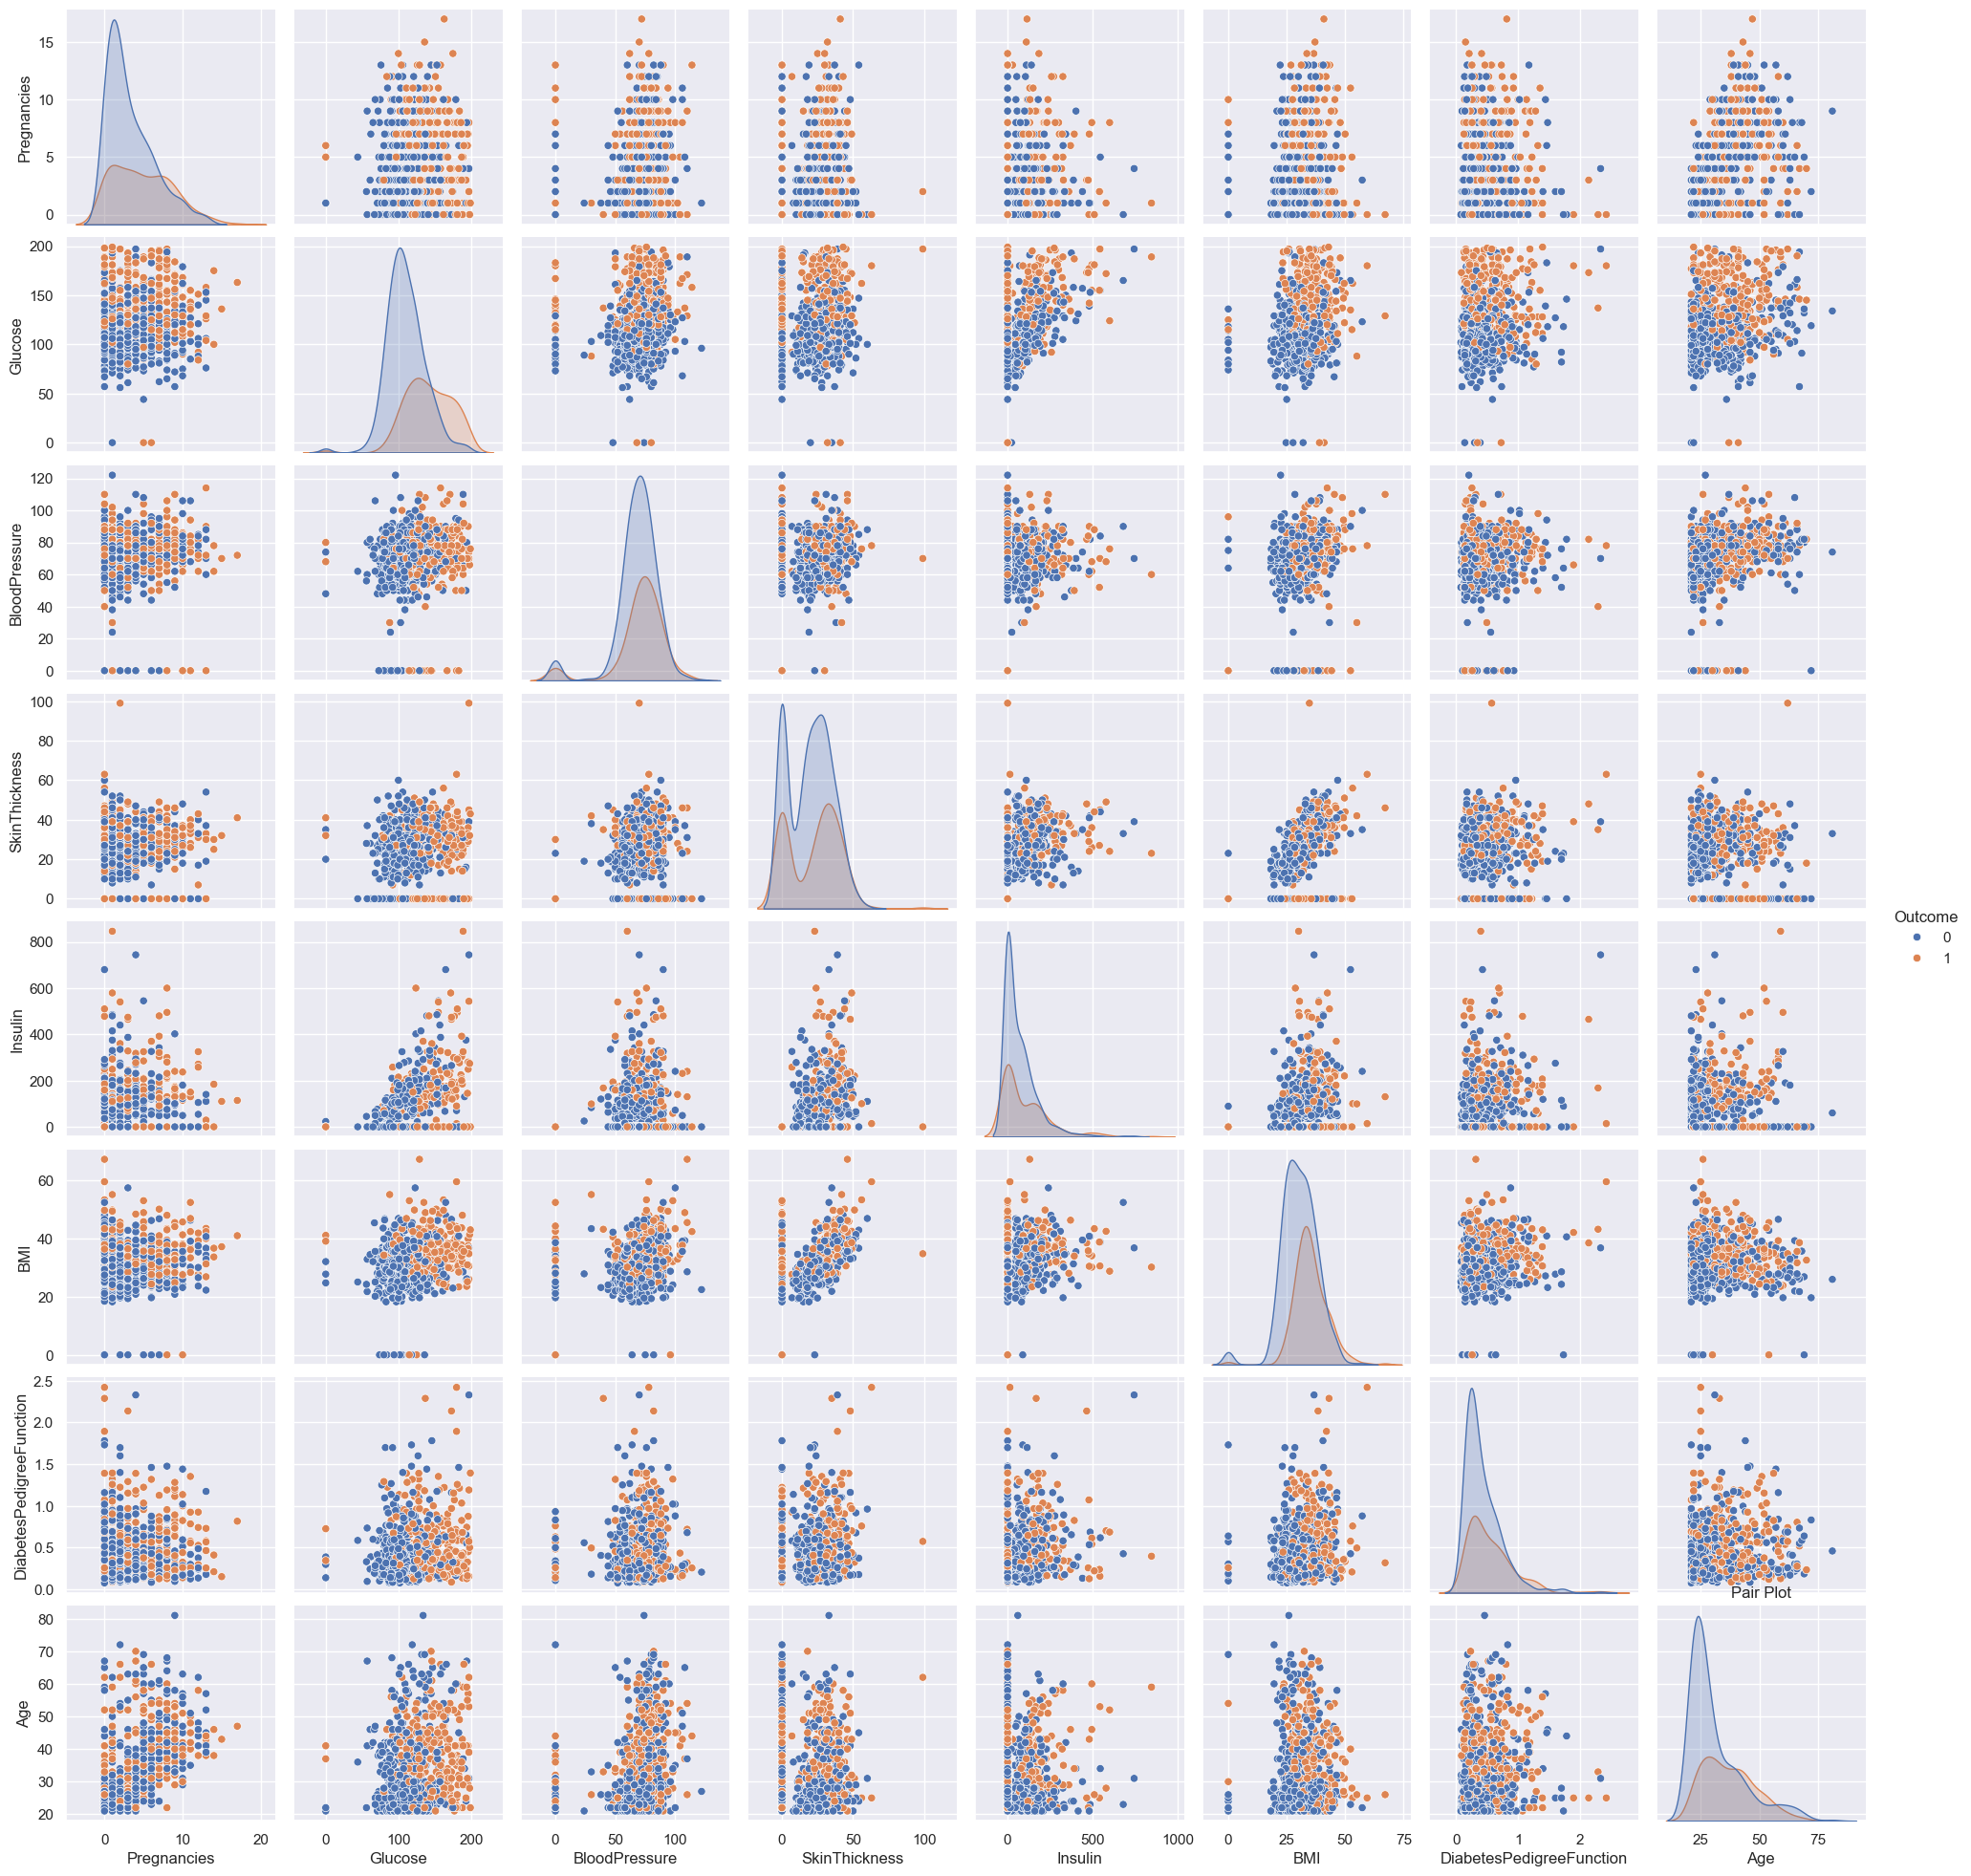

In [35]:
# Creating a pair plot to visualize pairwise relationships between variables, with 'Outcome' as the hue
sns.pairplot(df, hue='Outcome')

# Adding a title to the plot
plt.title('Pair Plot')

# Display the pair plot
plt.show()

We can observe a positive relationship between SkinThickness and BMI (body mass index), Glucose and Insulin levels, as well as Pregnancies and Age. This analysis can be useful as a starting point for further in-depth exploration of the data. It provides insights into potential connections or patterns between these variables, which could be further investigated to gain a better understanding of the data and potentially uncover important relationships for our analysis. Also we can observe outliers.